<a href="https://colab.research.google.com/github/AleksandraBelousova/Analyzing-Chaotic-Attractors/blob/main/Analyzing_Chaotic_Attractors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -L -o dataset.zip 'https://drive.google.com/uc?export=download&id=1-uDjymQ7bIlKH7wPvXgvzxZdNlq2dNjh'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1589k  100 1589k    0     0   471k      0  0:00:03  0:00:03 --:--:--  794k


In [6]:
import zipfile
with zipfile.ZipFile('/content/dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

    time    distance      angle1      pos1x      pos1y      angle2      pos2x  \
0  0.000  226.849618   60.186387 -89.248232   6.160988  -21.000000  95.699585   
1  0.043  192.198913   17.019983 -96.499187  11.436376  -34.198913  88.998620   
2  0.094  180.723094   23.767442 -91.720325  22.288204  -35.922007  82.071513   
3  0.139  178.443290 -162.240866 -95.301189  11.107727  145.634702  88.723438   
4  0.185  189.791250 -156.956014 -99.936926   0.209883  134.843452  97.159488   

       pos2y  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  \
0  11.202965         NaN         NaN          NaN          NaN          NaN   
1  21.063538         NaN         NaN          NaN          NaN          NaN   
2  30.625227         NaN         NaN          NaN          NaN          NaN   
3  20.897701         NaN         NaN          NaN          NaN          NaN   
4  12.507625         NaN         NaN          NaN          NaN          NaN   

   Unnamed: 13  Unnamed: 14  Unnamed: 

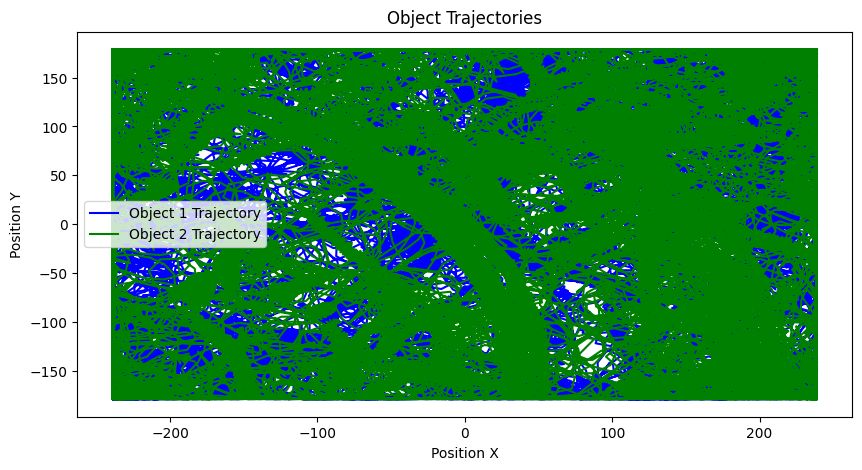

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
csv_file_path = '/content/dataset/data.csv'
df = pd.read_csv(csv_file_path)
df.columns = df.columns.str.strip()
print(df.head())
plt.figure(figsize=(10, 5))
plt.plot(df['pos1x'], df['pos1y'], label='Object 1 Trajectory', color='b')
plt.plot(df['pos2x'], df['pos2y'], label='Object 2 Trajectory', color='g')
plt.title('Object Trajectories')
plt.xlabel('Position X')
plt.ylabel('Position Y')
plt.legend()
plt.show()

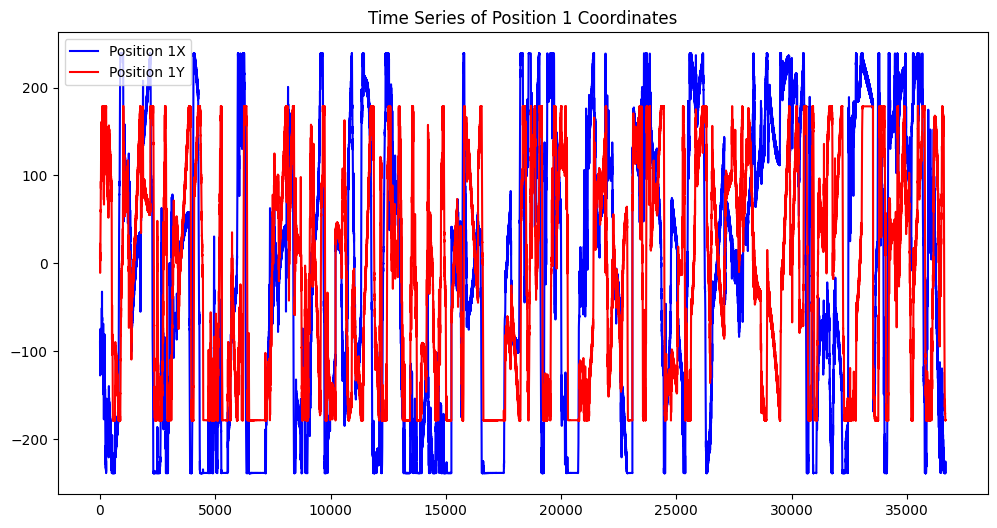

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df['pos1x'], label='Position 1X', color='b')
plt.plot(df['pos1y'], label='Position 1Y', color='r')
plt.title('Time Series of Position 1 Coordinates')
plt.legend()
plt.show()

In [10]:
import plotly.express as px
fig = px.scatter_3d(df.head(1000), x='pos1x', y='pos1y', z='pos2x')
fig.show()

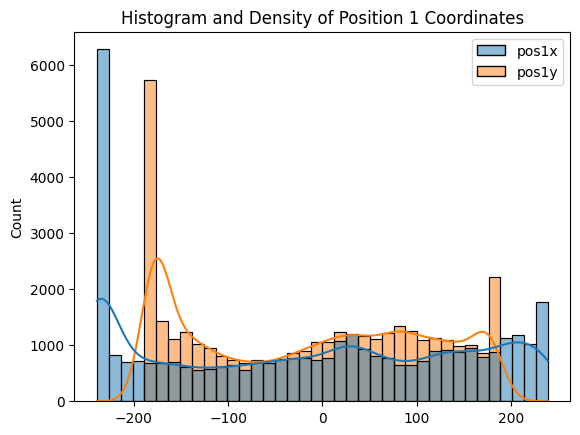

In [11]:
import seaborn as sns
sns.histplot(df[['pos1x', 'pos1y']], kde=True)
plt.title('Histogram and Density of Position 1 Coordinates')
plt.show()

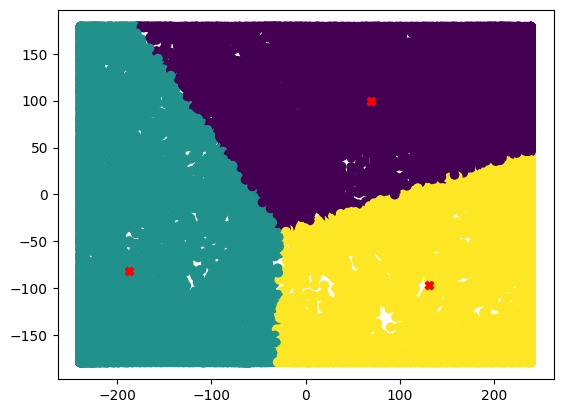

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(df[['pos1x', 'pos1y']])
plt.scatter(df['pos1x'], df['pos1y'], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X')
plt.show()

In [13]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['pos1x'], order=(5, 1, 0)).fit()
forecast = model.forecast(steps=10)
print("Forecast:", forecast)

Forecast: 36675   -236.927281
36676   -237.331864
36677   -237.516115
36678   -238.669083
36679   -237.362976
36680   -237.555342
36681   -237.462649
36682   -237.434182
36683   -237.338186
36684   -237.472818
Name: predicted_mean, dtype: float64


In [14]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
X, y = [], []
for i in range(len(df['pos1x']) - 10):
    X.append(df['pos1x'].iloc[i:i+10])
    y.append(df['pos1x'].iloc[i+10])
X = np.array(X).reshape(-1, 10, 1)
y = np.array(y)

model = Sequential()
model.add(LSTM(50, input_shape=(10, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=50, batch_size=32, verbose=1)

yhat = model.predict(X[-1].reshape(1, 10, 1))
print("LSTM Forecast:", yhat)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1146/1146 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 23296.6426
Epoch 2/50
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 13581.5508
Epoch 3/50
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - loss: 8190.3589
Epoch 4/50
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 4577.2368
Epoch 5/50
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 2315.9197
Epoch 6/50
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 1019.8362
Epoch 7/50
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 435.6151
Epoch 8/50
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 158.1947
Epoch 9/50
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 89.6295
Epoch 10/50
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 65.7469
Epoch 11/50
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 66.2845
Epoch 12/50
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 66.9245
Epoch 13/50
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 73.1383
Epoch 14/50
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 66.0586


In [16]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.7 MB/s eta 0:00:00


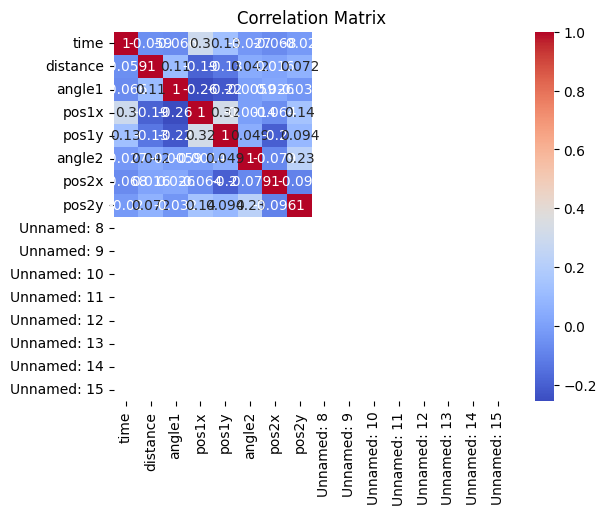

ADF Statistic: -7.635289276472477
p-value: 1.959786150596342e-11
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=262734.979, Time=27.86 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=263410.773, Time=1.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=263321.055, Time=1.33 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=263326.166, Time=3.82 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=263408.780, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=263294.775, Time=5.61 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=263294.397, Time=15.64 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=263292.440, Time=5.42 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=263293.147, Time=2.19 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=263021.951, Time=72.19 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=262732.986, Time=10.72 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=263324.174, Time=1.53 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=263319.064, Time=0.53 sec
 ARI

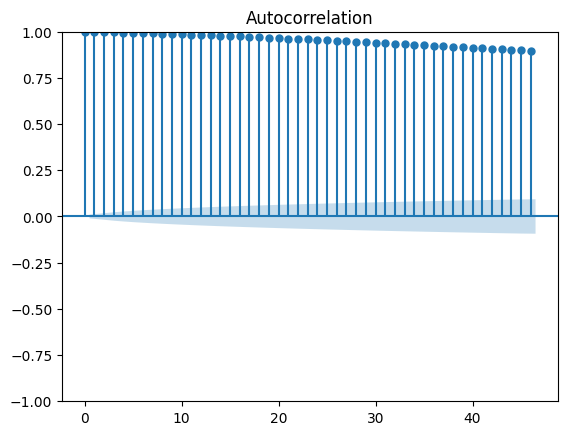

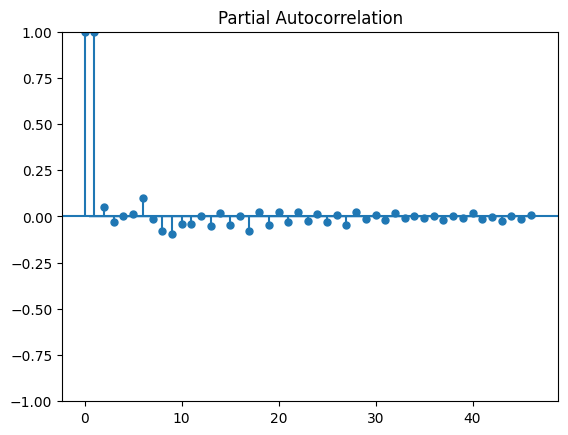

Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 22671.8047
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 12393.3555
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 6784.9136
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 3060.4104
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 1316.2910
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 501.1224
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 202.3347
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 96.0355
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 73.1372
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 73.9696
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
LSTM Forecast: [[-234.69536]]


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from pmdarima import auto_arima

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

result = adfuller(df['pos1x'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

stepwise_fit = auto_arima(df['pos1x'], start_p=1, start_q=1,
                          max_p=5, max_q=5, m=1,
                          seasonal=False,
                          trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)

print(stepwise_fit.summary())

plot_acf(df['pos1x'])
plot_pacf(df['pos1x'])
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)

def build_lstm_model(optimizer='adam', loss='mse'):
    model = Sequential()
    model.add(Input(shape=(10, 1)))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss=loss)
    return model

X, y = [], []
for i in range(len(df['pos1x']) - 10):
    X.append(df['pos1x'].iloc[i:i+10])
    y.append(df['pos1x'].iloc[i+10])
X = np.array(X).reshape(-1, 10, 1)
y = np.array(y)

model = build_lstm_model()
model.fit(X, y, epochs=10, batch_size=32)

yhat = model.predict(X[-1].reshape(1, 10, 1))
print("LSTM Forecast:", yhat)

Ljung-Box Statistic: lb_stat, p-value: lb_pvalue


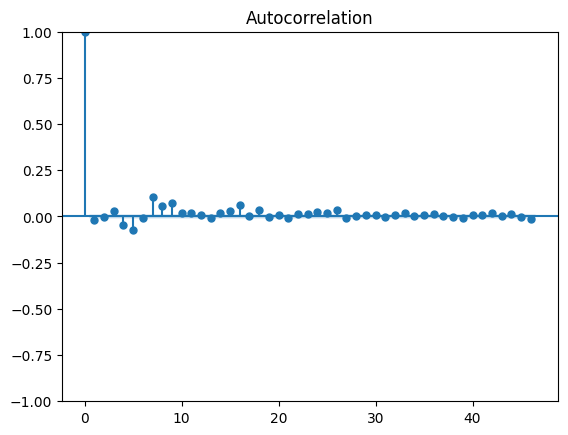

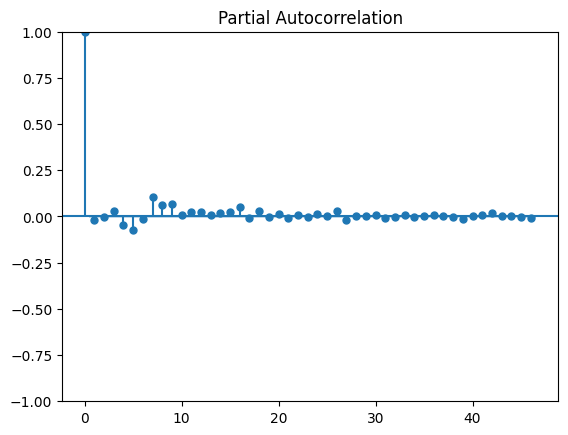

In [21]:
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

residuals = stepwise_fit.resid()
lb_stat, lb_pvalue = acorr_ljungbox(residuals, lags=[10])
print(f'Ljung-Box Statistic: {lb_stat}, p-value: {lb_pvalue}')

plot_acf(residuals)
plot_pacf(residuals)
plt.show()

                                     SARIMAX Results                                      
Dep. Variable:                              pos1x   No. Observations:                36675
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood             -131637.055
Date:                            Thu, 23 Jan 2025   AIC                         263284.111
Time:                                    18:32:49   BIC                         263326.658
Sample:                                         0   HQIC                        263297.634
                                          - 36675                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9773      0.007    144.931      0.000       0.964       0.990
ma.L1         -0.9671      0.008   

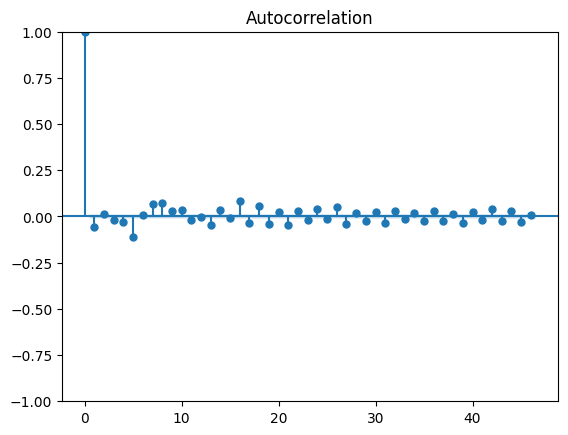

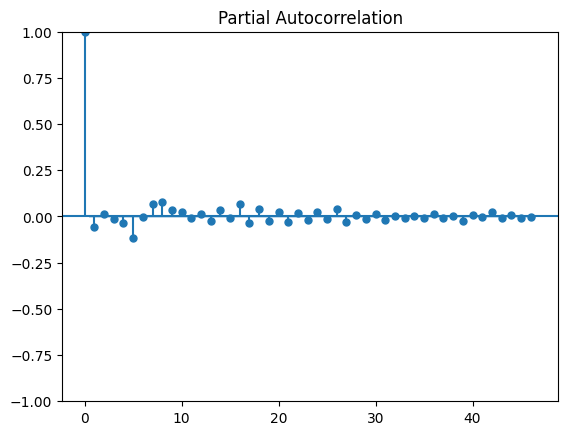

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(df['pos1x'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fitted = sarima_model.fit(disp=False)

print(sarima_fitted.summary())

residuals_sarima = sarima_fitted.resid
lb_test_sarima = acorr_ljungbox(residuals_sarima, lags=[10])
lb_stat_sarima = lb_test_sarima['lb_stat'].values[0]
lb_pvalue_sarima = lb_test_sarima['lb_pvalue'].values[0]

print(f'Ljung-Box Statistic (SARIMA): {lb_stat_sarima}, p-value: {lb_pvalue_sarima}')

plot_acf(residuals_sarima)
plot_pacf(residuals_sarima)
plt.show()